## Analysis of decoder performance for the four generated linear decoders

This notebook analyses each of the generated linear decoder's performance in the closed loop in four groups:
 - E : all rigid bodies bar the right hand (control rigid body)
 - F : all rigid bodies bar the right side 
 - G : Left Hand only
 - H : Right Hand Only (control)
 - I : Lower body
 - J : Head and Neck

In [1]:
# First import the necessary libraries
import sys
import numpy as np
import os
import matplotlib.pyplot as plt
sys.path.insert(0,'/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces')
from Experiment_pointer.DataAnalysis.postProcessRawData import processTrialData, readIndividualTargetMovements,plotVar,calcNormalisedAcquisitionTimes


In [2]:
# function to plot trajectories
def plotTrajectoriesClosedLoop(returnDict,k = None,savepath=None, failed = False):
    """
    Args:

    failed: true if plotting failed acquisitions
    """
    individualMovements = readIndividualTargetMovements(returnDict)
    print("First let's plot the trajectories")
    if k is not None and k.__class__ != list:
        
        cursorPosData = [individualMovements['cursorPosData'][0:int(2*k):2]] #  trajectories
    
    elif k.__class__ == list:

         cursorPosData = [individualMovements['cursorPosData'][i] for i in k]
    else:
        cursorPosData = individualMovements['cursorPosData'][0:-1:3] #  trajectories

    plotVar(cursorPosData,list_ = True,invertY=True)

    if failed:
        targetLocations = [returnDict['targetBoxLocs'][i] for i in k]
        plotVar(targetLocations, list_ = True, invertY = True, points = True)
    ax1 = plt.gca()  # Get current axes


    # Remove top and right spines for the first plot
    ax1.spines['top'].set_visible(False)
    ax1.spines['right'].set_visible(False)

    # Reduce x and y ticks and increase font
    plt.xticks([0,1], fontsize = 20)
    plt.yticks([0,1],fontsize = 20)
    plt.xlabel("Normalised X position", fontsize = 20, fontweight = "bold")
    plt.ylabel("Normalised Y position",fontsize = 20,fontweight = "bold")
    if savepath is not None:
        pass
        plt.savefig(savepath)
    plt.show()


    print("Now let's plot the evolution of normalised aquisition time")
    acquireTimes = calcNormalisedAcquisitionTimes_jpy(individualMovements)
    return acquireTimes

def calcHumanPerformance_jpy(totalTime,reactionTime,D,W):
    """uses Fitts law to calculate human performance"""
    MT = totalTime - reactionTime
    ID = np.log2((2*D)/W)
    IP = ID / MT
    return IP

def calcDist(startPos,endPos):
    ranges = [1100,800]
    return np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))

def calcNormalisedAcquisitionTimes_jpy(processedDataDict,start = 0, end = -1,reactionTime = 300):
    """
    This function takes in data giving the start and location for each acquisition and 
    """
    cursorPosData = processedDataDict['cursorPosData'][start:end]
    timestamps = processedDataDict['timestamps'][start:end]
    IPs = []
    pathLengths = []

    for idx,var in enumerate(cursorPosData):
        var = var.transpose()
        # Calculate the distance to each target from the starting point
        startPos = (var[0,0],var[0,1])
        endPos = (var[-1,0],var[-1,1])
        idxes = len(var[:,0])
        distToTarget = np.sqrt(np.sum([ (endPos[i] - startPos[i]) ** 2 for i in range(len(startPos))]))
        
        # Calculate distance unnormalised distance for fitts law
        ranges = [1100,800]
        D = np.sqrt(np.sum([ (ranges[i] * (endPos[i] - startPos[i])) ** 2 for i in range(len(startPos))]))
        if D == 0:
            continue
        pathlength =sum([calcDist( (var[i,0],var[i,1]), (var[i+1,0],var[i+1,1])  ) for i in range(0,idxes-2)])
        #print(pathlength)
        pathLengths.append(pathlength)
        # Calculate the time difference  
        timeStart = timestamps[idx][0]
        timeEnd = timestamps[idx][-1]




        # the raw acquisition time before being normalised for distance and reaction time
        totalTime = timeEnd - timeStart
        cursorWidth = 60
        IP = calcHumanPerformance_jpy(totalTime,reactionTime,D,W=60)
        IPs.append(IP)
        

        
    plt.plot(IPs, label = "Index of Performances")
    plt.show()
    return IPs,pathLengths
    

We first start with group A

Plot the cursor position paths

In [3]:
# i =  "../PointerExperimentData/Ashwin_12_01__19_57_trial1" 
# from Experiment_pointer.runFullExperiment import *
# modelA_dict = fitModelToData(mode = 'RigidBodiesSetA',tester = 'linear', \
# compPca = None,savePath=i, colorMap=colorMap,plot=False,DOFOffset= 0.01,ignoreTargetMotionTimesLessThan=0)
# #gather pred pos
# print(modelA_dict['Times'])
# print(len(modelA_dict['TestCursorPos']))
decoderEColor = (245,5,5) # (RGB) or F50505 (Hex)
decoderEColorPlt = (245/255,5/255,5/255) # (RGB) or F50505 (Hex)
decoderEColorbar = 'rgb(245,5,5)'

decoderFColor = (53,5,245) # (RGB) or #3505F5 (Hex)
decoderFColorPlt = (53/255,5/255,245/255) # (RGB) or #3505F5 (Hex)
decoderFColorbar = 'rgb(53,5,245)'

decoderGColor = (2,250,242) # (RGB) or  #02FAF2 (Hex)
decoderGColorPlt = (2/255,250/255,242/255) # (RGB) or  #02FAF2 (Hex)
decoderGColorbar = 'rgb(2,250,242)'

decoderHColor = (245,237,5) # (RGB) or F5ED05 (Hex)
decoderHColorPlt = (245/255,237/255,5/255) # (RGB) or F5ED05 (Hex)
decoderHColorbar = 'rgb(245,237,5)'

decoderIColor = (81,142,55) # (RGB) or F5ED05 (Hex)
decoderIColorPlt = (81/255,142/255,55/255) # (RGB) or F5ED05 (Hex)
decoderIColorbar = 'rgb(81,142,55)'

decoderJColor = (255,20,242) # (RGB) or F5ED05 (Hex)
decoderJColorPlt = (255/255,20/255,242/255) # (RGB) or F5ED05 (Hex)
decoderJColorbar = 'rgb(255,20,242)'


In [4]:
# IPs = plotTraj(modelA_dict, k=20,i=i)
# print(IPs)

def plotDecoderTrajectories(gameSavePath,decoderType,returnDict):
    returnDict = processTrialData(gameSavePath+ "_usingDecoder" + decoderType + ".npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)


    # Submit all target acquisitions to k
    idxes = [i for i in range(len(returnDict['successfulAcquires'])-1) if returnDict['successfulAcquires'][i] == True ]

    print("Successful targets acquired: ", idxes)

    # Plot all successful acquisitions 
    successfulAcquires,successfulPaths = plotTrajectoriesClosedLoop(returnDict,k = idxes,savepath=gameSavePath + "decoderSuccess" + decoderType + "Traj_closedLoop(c).svg")




    # Submit all failed target acquisitions to k
    idxesFailed = [i for i in range(len(returnDict['successfulAcquires'] ) - 1) if returnDict['successfulAcquires'][i] == False ]

    print("Targets unsuccessfully acquired",idxesFailed)

    # Plot all failed acquisitions 
    unsuccessfulAcquires,unsuccessfulPaths = plotTrajectoriesClosedLoop(returnDict,k = idxesFailed,savepath=gameSavePath + "decoderFailed" + decoderType +  "Traj_closedLoop(c).svg",failed = True)

    return successfulAcquires, successfulPaths, unsuccessfulPaths, unsuccessfulAcquires


/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces
pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


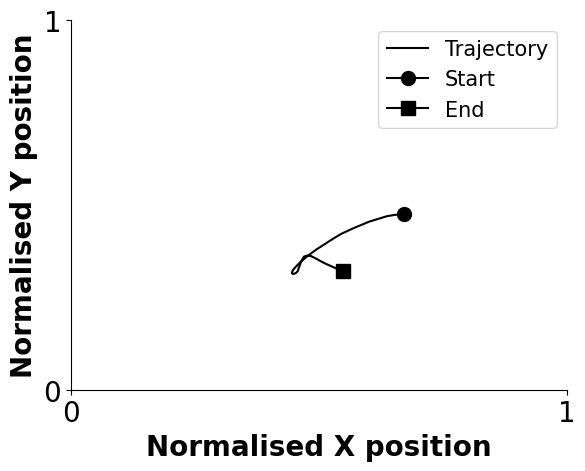

Now let's plot the evolution of normalised aquisition time


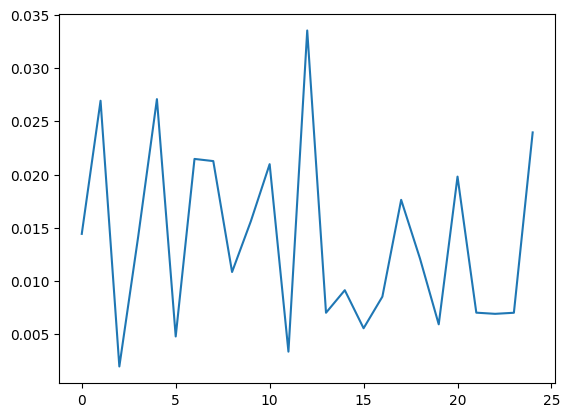

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Targets unsuccessfully acquired []
First let's plot the trajectories


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


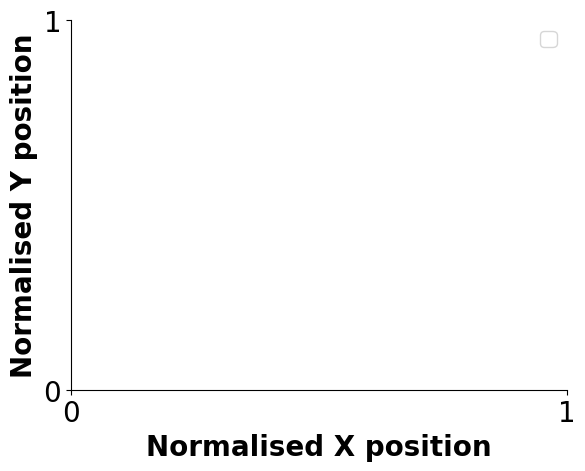

Now let's plot the evolution of normalised aquisition time


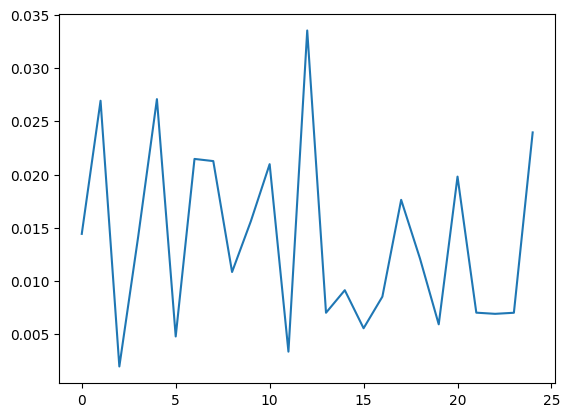

In [5]:

print(os.getcwd())
# saveFile = "../PointerExperimentData/Ashwin_13_02"
# saveGameLocation = saveFile + "/Ash_13_02_13_19" # must have format of "Name_dd_mm__hh_mm_metadata" with no file extension
from Experiment_pointer.runFullExperiment import saveDirectory, saveGameLocation
saveFile = saveDirectory
gameSavePath = saveGameLocation

path = "/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis"
os.chdir(path)

# Replace Experiment pointer with .. as notebook runs from another directory
saveFile = saveFile.replace("Experiment_pointer","..")
gameSavePath = gameSavePath.replace("Experiment_pointer","..")

returnDict = processTrialData(gameSavePath+"_usingDecoderE.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresE, successfulPathsE, failedAcquiresE, failedAcquiresE = plotDecoderTrajectories(gameSavePath, decoderType = "E", returnDict = returnDict)

Now move to group F

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 1, 2, 3, 4, 5, 7, 8, 10]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


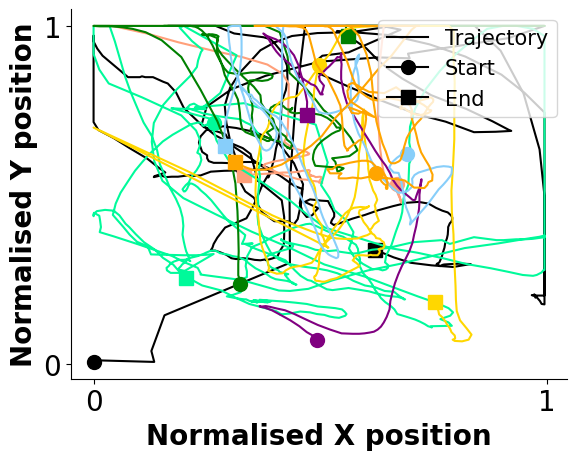

Now let's plot the evolution of normalised aquisition time


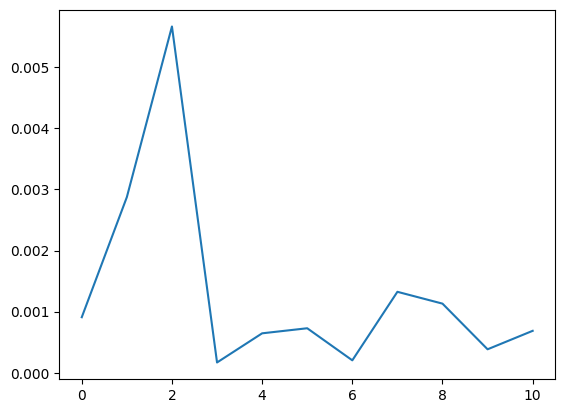

Targets unsuccessfully acquired [6, 9]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


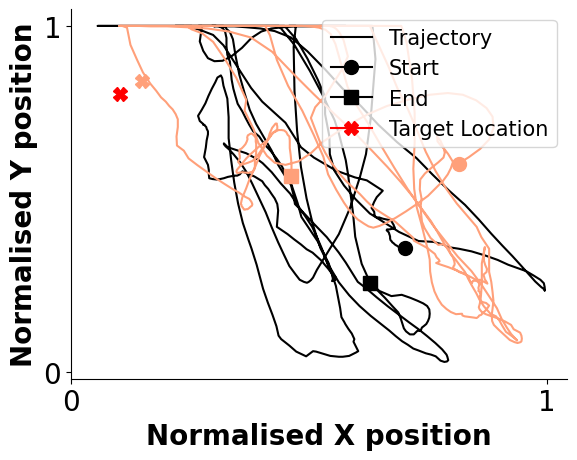

Now let's plot the evolution of normalised aquisition time


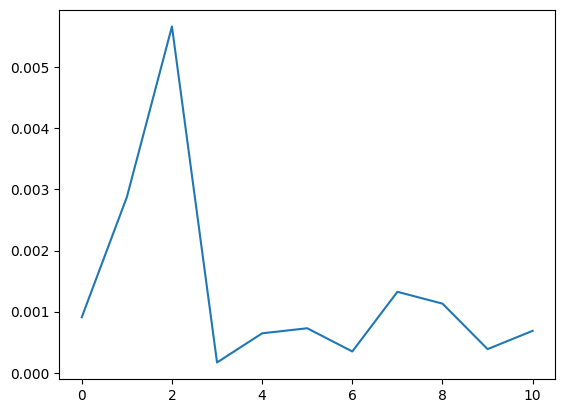

In [6]:
# Group F

returnDict = processTrialData(gameSavePath+"_usingDecoderF.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresF, successfulPathsF, failedAcquiresF, failedAcquiresF = plotDecoderTrajectories(gameSavePath, decoderType = "F", returnDict = returnDict)

Now we move to group G

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 1, 2, 4, 5, 6, 7, 9, 10, 11, 12, 14]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


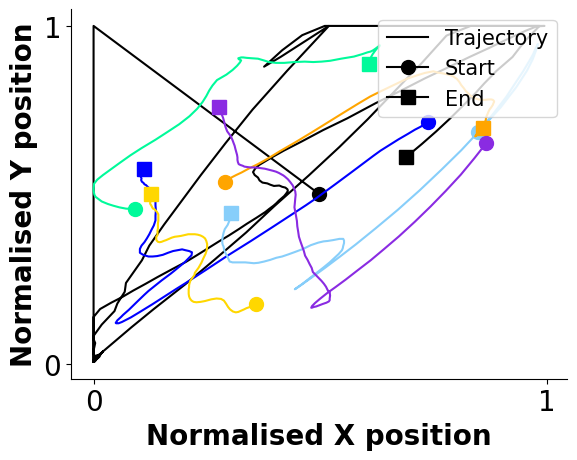

Now let's plot the evolution of normalised aquisition time


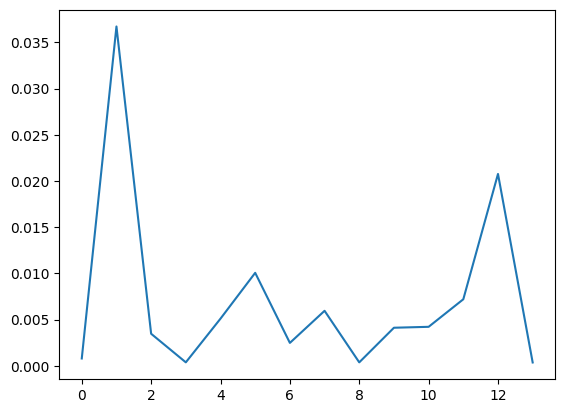

Targets unsuccessfully acquired [3, 8, 13]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


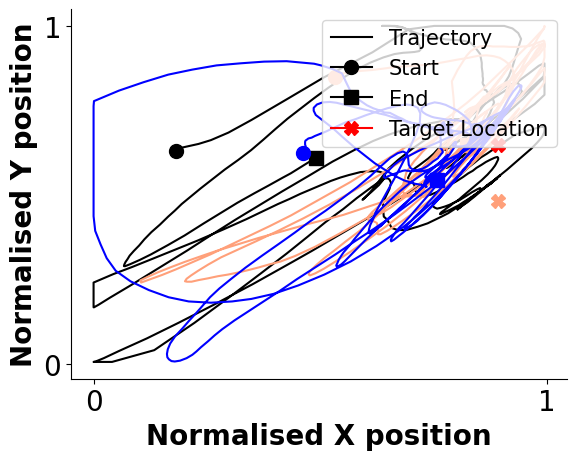

Now let's plot the evolution of normalised aquisition time


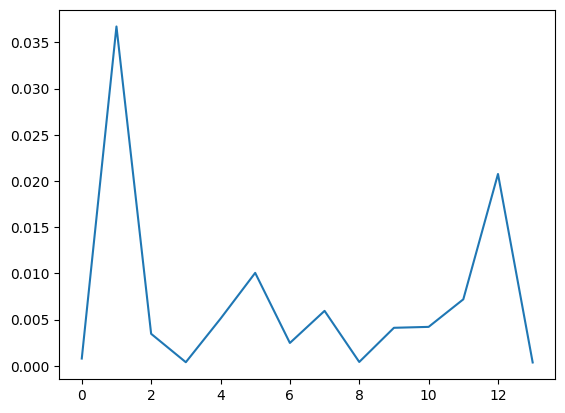

In [7]:
# Group G


returnDict = processTrialData(gameSavePath+"_usingDecoderG.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresG, successfulPathsG, failedAcquiresG, failedAcquiresG = plotDecoderTrajectories(gameSavePath, decoderType = "G", returnDict = returnDict)

And finally group D, the control

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


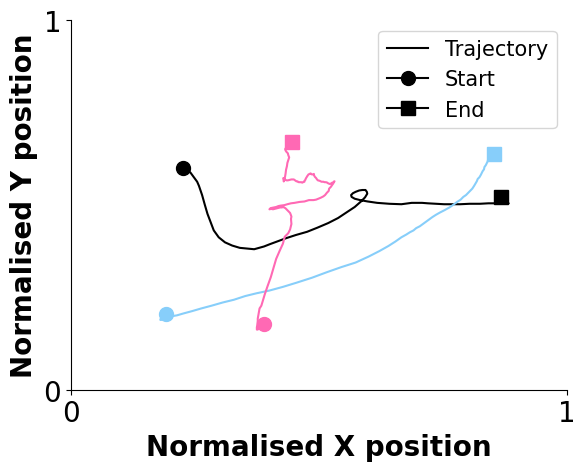

Now let's plot the evolution of normalised aquisition time


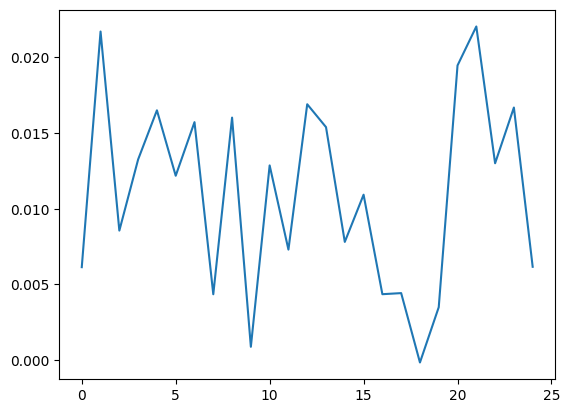

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Targets unsuccessfully acquired []
First let's plot the trajectories


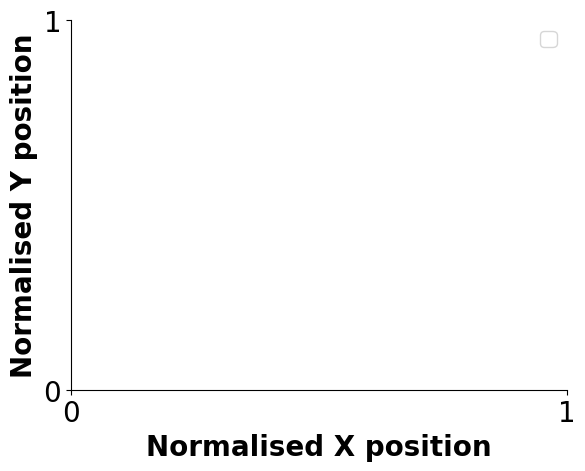

Now let's plot the evolution of normalised aquisition time


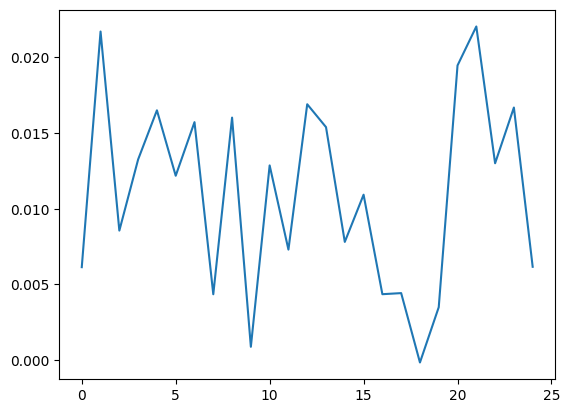

In [8]:
# Group H



returnDict = processTrialData(gameSavePath+"_usingDecoderH.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresH, successfulPathsH, failedAcquiresH, failedAcquiresH = plotDecoderTrajectories(gameSavePath, decoderType = "H", returnDict = returnDict)

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 3, 4, 5, 8]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


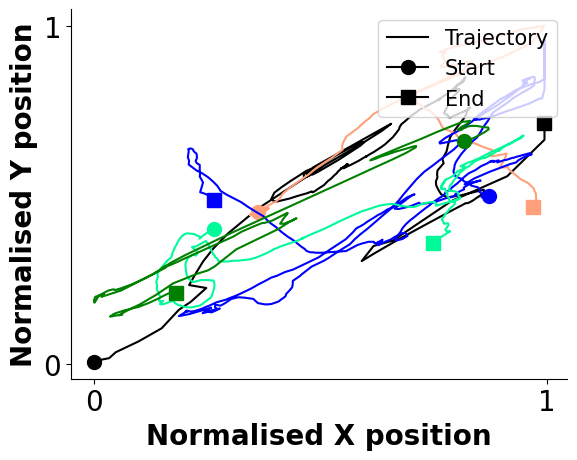

Now let's plot the evolution of normalised aquisition time


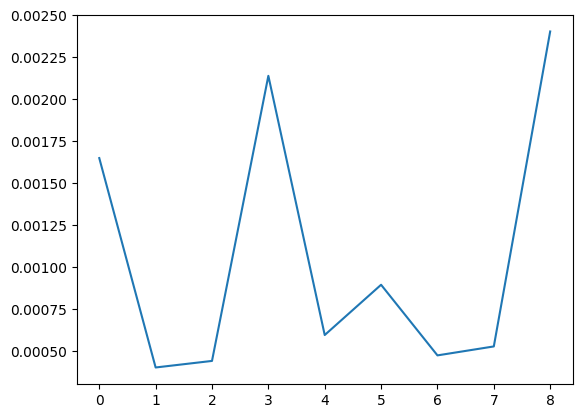

Targets unsuccessfully acquired [1, 2, 6, 7]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


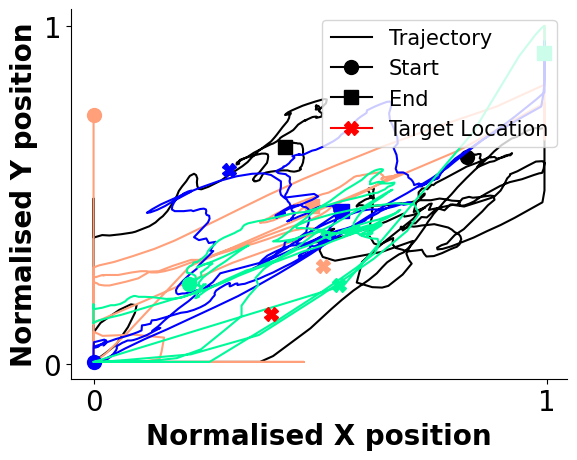

Now let's plot the evolution of normalised aquisition time


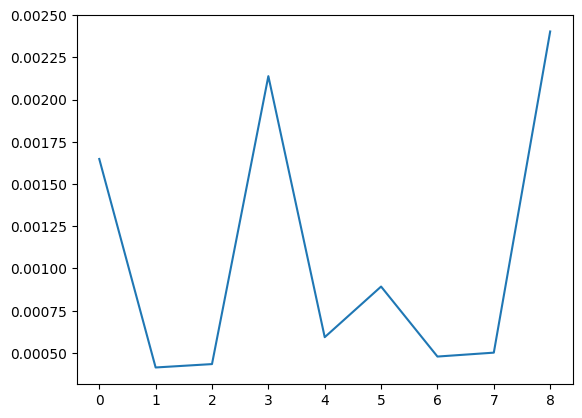

In [9]:
# Group I



returnDict = processTrialData(gameSavePath+"_usingDecoderI.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresI, successfulPathsI, failedAcquiresI, failedAcquiresI = plotDecoderTrajectories(gameSavePath, decoderType = "I", returnDict = returnDict)

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis
Successful targets acquired:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
First let's plot the trajectories


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/2032096882.py:39: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(savepath)


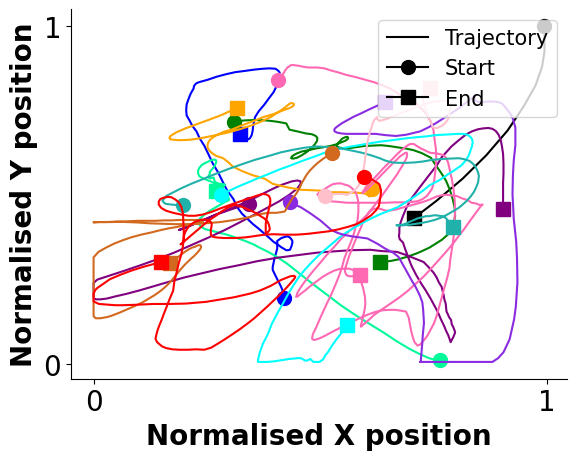

Now let's plot the evolution of normalised aquisition time


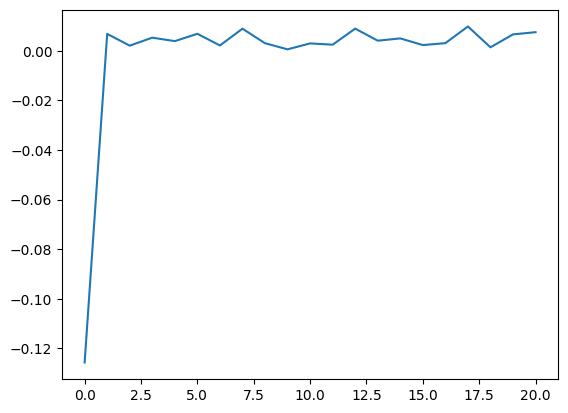

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Targets unsuccessfully acquired []
First let's plot the trajectories


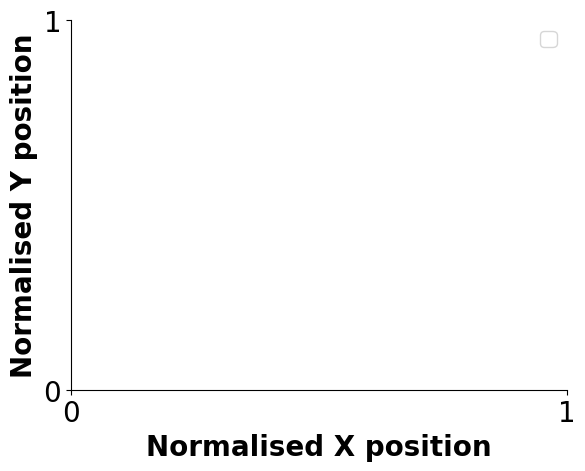

Now let's plot the evolution of normalised aquisition time


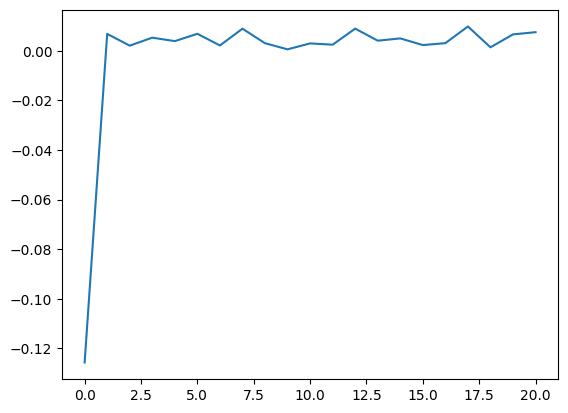

In [10]:
# Group J



returnDict = processTrialData(gameSavePath+"_usingDecoderJ.npz",None,DOFOffset=0.03,returnAsDict=True,ignoreCalibration= True)
successfulAcquiresJ, successfulPathsJ, failedAcquiresJ, failedAcquiresJ = plotDecoderTrajectories(gameSavePath, decoderType = "J", returnDict = returnDict)

Now let's overlay all aquisition time plots

In [11]:
decoderEColor = (245,5,5) # (RGB) or F50505 (Hex)
decoderEColorPlt = (245/255,5/255,5/255) # (RGB) or F50505 (Hex)
decoderEColor_ = 'rgb(245,5,5)'
decoderFColor = (53,5,245) # (RGB) or #3505F5 (Hex)
decoderFColorPlt = (53/255,5/255,245/255) # (RGB) or #3505F5 (Hex)
decoderFColor_ = 'rgb(53,5,245)'
decoderGColor = (2,250,242) # (RGB) or  #02FAF2 (Hex)
decoderGColorPlt = (2/255,250/255,242/255) # (RGB) or  #02FAF2 (Hex)
decoderGColor_ = 'rgb(2,250,242)'
decoderHColor = (245,237,5) # (RGB) or F5ED05 (Hex)
decoderHColorPlt = (245/255,237/255,5/255) # (RGB) or F5ED05 (Hex)
decoderHColor_ = 'rgb(245,237,5)'

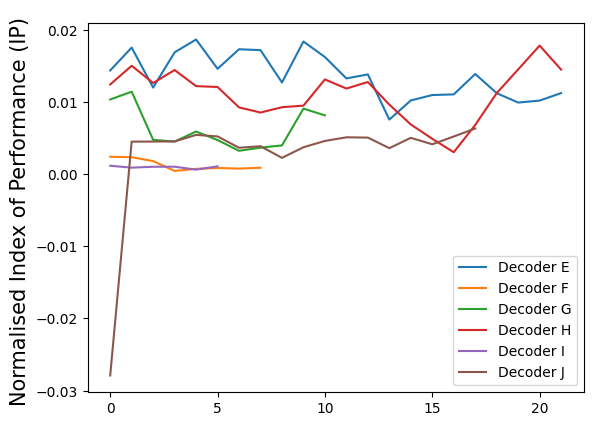

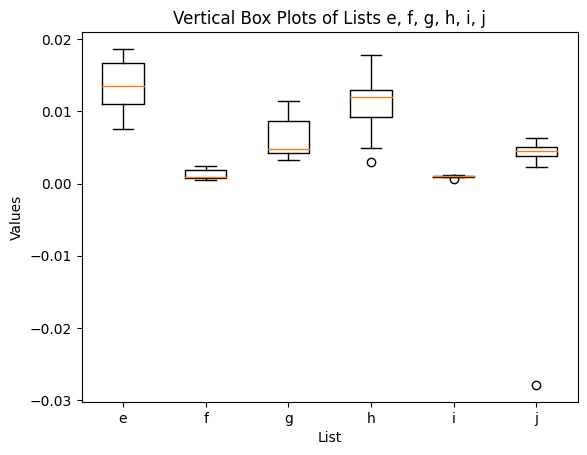

In [12]:
def smooth_list(data, window_size,useLog = False):
    """
    Smooths the data using a moving average filter.

    :param data: The list of numbers to be smoothed.
    :param window_size: The number of elements to consider in each average.
    :return: A list of smoothed numbers.
    """
    if useLog:
        data = [np.log(_) for _ in data ]
    if window_size <= 0:
        raise ValueError("Window size must be positive")

    if window_size > len(data):
        raise ValueError("Window size cannot be larger than the data list length")

    smoothed_data = []
    for i in range(len(data) - window_size + 1):
        window = data[i:i + window_size]
        window_average = sum(window) / window_size
        smoothed_data.append(window_average) #0.0128

    return smoothed_data

e__ = smooth_list(successfulAcquiresE,4)
f__ = smooth_list(successfulAcquiresF,4)
g__ = smooth_list(successfulAcquiresG,4)
h__ = smooth_list(successfulAcquiresH,4)
i__ = smooth_list(successfulAcquiresI,4)
j__ = smooth_list(successfulAcquiresJ,4)
plt.plot(e__, label = "Decoder E")
plt.plot(f__, label = "Decoder F")
plt.plot(g__, label = "Decoder G")
plt.plot(h__, label = "Decoder H")
plt.plot(i__, label = "Decoder I")
plt.plot(j__, label = "Decoder J")
#plt.plot(smooth_list(IPs,5), label = "Nominal")
plt.ylabel("Normalised Index of Performance (IP) ",fontsize = 15)
plt.legend()
plt.show()

# Create a figure and an axes
fig, ax = plt.subplots()

# Plotting the box plots
ax.boxplot([e__, f__, g__, h__, i__, j__])

# Adding titles and labels
ax.set_title('Vertical Box Plots of Lists e, f, g, h, i, j')
ax.set_xlabel('List')
ax.set_ylabel('Values')
ax.set_xticklabels(['e', 'f', 'g', 'h', 'i', 'j'])

# Show the plot
plt.show()

/Users/ashwin/Documents/Y4 project Brain Human Interfaces/General 4th year Github repo/BrainMachineInterfaces/Experiment_pointer/DataAnalysis


/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_performances.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_performances.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:33: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_performances.svg")


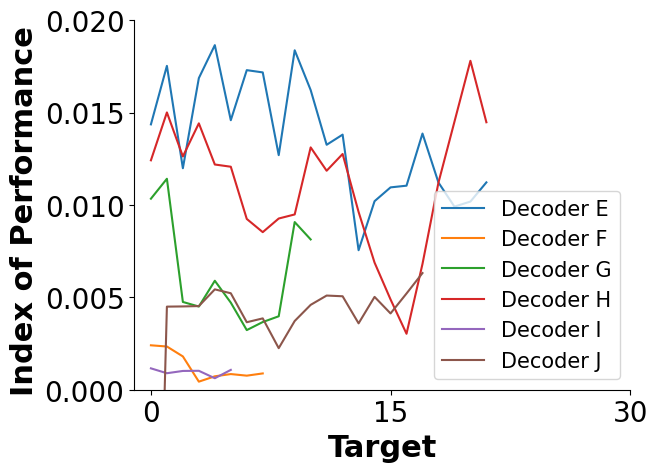

/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_pathLengths.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_pathLengths.svg")
/var/folders/bd/_1l03dkj5l11l_q7br4tgzh40000gn/T/ipykernel_67801/841776172.py:71: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig(gameSavePath + "_pathLengths.svg")


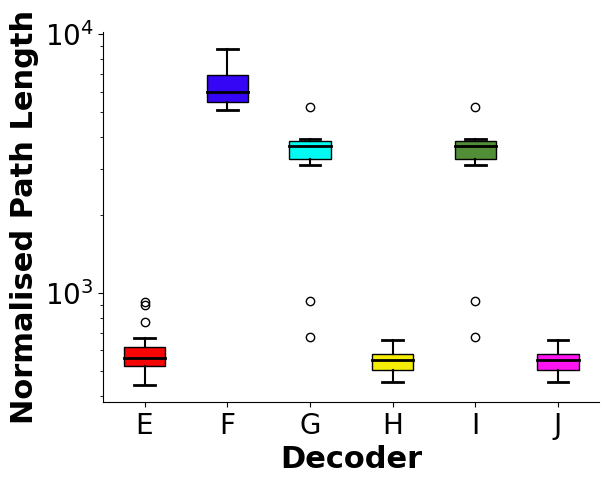

In [13]:
# Finally path length metric
print(os.getcwd())
e = smooth_list(successfulPathsE,4,useLog = False)
e_ = [np.log(i) for i in e]
f = smooth_list(successfulPathsF,4,useLog = False)
f_ = [np.log(i) for i in f]
g = smooth_list(successfulPathsG,4,useLog = False)
g_ = [np.log(i) for i in g]
h = smooth_list(successfulPathsH,4,useLog = False)
h_ = [np.log(i) for i in h]
i = smooth_list(successfulPathsG,4,useLog = False)
i_ = [np.log(i_) for i_ in i]
j = smooth_list(successfulPathsH,4,useLog = False)
j_ = [np.log(i) for i in j]

plt.plot(e__, label = "Decoder E")
plt.plot(f__, label = "Decoder F")
plt.plot(g__, label = "Decoder G")
plt.plot(h__, label = "Decoder H")
plt.plot(i__, label = "Decoder I")
plt.plot(j__, label = "Decoder J")
#plt.plot(smooth_list(IPs,5), label = "Nominal")
plt.ylabel("Index of Performance ",fontsize = 22,fontweight='bold')
plt.xlabel("Target",fontsize = 22,fontweight='bold')
plt.legend(fontsize = 15)
plt.xticks([0,15,30])
plt.ylim(0,0.02)
ax1 = plt.gca()
ax1.tick_params(labelsize = 20)
ax1 = plt.gca()
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(gameSavePath + "_performances.svg")
plt.show()

# Create a figure and an axes
fig, ax = plt.subplots()

# Plotting the box plots
# ax.boxplot([a, b, c, d])

box = ax.boxplot([e, f, g, h, i ,j], patch_artist=True)
# Customize colors
colors = [decoderEColorPlt, decoderFColorPlt, decoderGColorPlt,decoderHColorPlt, decoderIColorPlt,decoderJColorPlt]
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

# Customize the whiskers, caps, and median
for whisker in box['whiskers']:
    whisker.set(color='black', linewidth=1.5)
for cap in box['caps']:
    cap.set(color='black', linewidth=2)
for median in box['medians']:
    median.set(color='black', linewidth=2)
# Adding titles and labels

ax.set_xlabel('Decoder',fontsize = 22,fontweight='bold')
ax.set_ylabel('Normalised Path Length',fontsize = 22,fontweight='bold')
ax.tick_params(labelsize = 20)
ax.set_xticklabels(['E', 'F', 'G', 'H', 'I', 'J'])
plt.yscale('log')

# Show the plot

ax1 = plt.gca()  # Get current axes


# Remove top and right spines for the first plot
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)
plt.savefig(gameSavePath + "_pathLengths.svg")
plt.show()